In [1]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

import pandas as pd

#pd.read_csv('/content/drive/My Drive/Bahman.Group.csv')
#pd.read_csv('/content/drive/My Drive/Zamyad.csv')
#pd.read_csv('/content/drive/My Drive/Nirou.Moharreke.csv')
#pd.read_csv('/content/drive/My Drive/S_Pars.Khodro.csv')
#pd.read_csv('/content/drive/My Drive/S_IranKhodroDiesel.csv')

!pip install unidecode
!pip install jdatetime
!pip install khayyam
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler
from unidecode import unidecode
import jdatetime
from khayyam import *
from sklearn.preprocessing import LabelEncoder

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#!pip install openpyxl

!pip install openpyxl==3.0.0
!pip install pandas
import pandas as pd
df= pd.read_csv('/content/drive/My Drive/social_data_files/tsetmc/Zamyad.csv')

hashtag_df = pd.DataFrame(pd.read_excel("/content/drive/MyDrive/social_data_files/telegram_data/khZamia.xlsx"))
hashtag_df.head()


#pd.read_csv('/content/drive/My Drive/social_data_files/adjusted/khZamia.csv')

,پایگاه داده,منتشر کننده,نام کاربری,لینک داشبورد,لینک اصلی,زمان انتشار,عنوان,خلاصه,متن,تعداد بازتاب,تعداد نمایش/واکنش,تعداد کامنت(برای خبر),تعداد لایک(برای کامنت و توییت),تعداد دیسلایک(برای کامنت),تعداد ریتوییت(برای توییتر),سنتیمنت اتوماتیک
0,telegram,Snip__Bourse,snip_bourse,/record/70982454,https://telegram.me/snip_bourse/6233,۱۳:۰۹:۲۰ ۱۴۰۰/۱۱/۱۰,NaN,"•️ کدام شرکت‌های بورسی در دی سود کردند؟ ""رشد 3...","•️ کدام شرکت‌های بورسی در دی سود کردند؟ ""رشد 3...",0,76,0,0,0,0,خنثی
1,telegram,Upterend || روند صعودی,Upterend,/record/70982485,https://telegram.me/Upterend/5937,۱۳:۰۲:۳۷ ۱۴۰۰/۱۱/۱۰,NaN,#عملکرد_کانال_خصوصی در یک روز خاص بازار که شاخ...,#عملکرد_کانال_خصوصی در یک روز خاص بازار که شاخ...,1,1967,0,0,0,0,مثبت
2,telegram,Economicpaper,economicpaper,/record/70982420,https://telegram.me/economicpaper/7853,۱۲:۰۳:۴۱ ۱۴۰۰/۱۱/۱۰,NaN,"•️ کدام شرکت‌های بورسی در دی سود کردند؟ ""رشد 3...","•️ کدام شرکت‌های بورسی در دی سود کردند؟ ""رشد 3...",0,11,0,0,0,0,خنثی
3,telegram,ره‌آورد ۳۶۵,rahavard365,/record/70982423,https://telegram.me/rahavard365/45372,۱۲:۰۰:۱۲ ۱۴۰۰/۱۱/۱۰,NaN,"•️ کدام شرکت‌های بورسی در دی سود کردند؟ ""رشد 3...","•️ کدام شرکت‌های بورسی در دی سود کردند؟ ""رشد 3...",3,2072,0,0,0,0,خنثی
4,telegram,اخبار شرکتها و مجامع بورسی,akhbar_majame,/record/70982458,https://telegram.me/akhbar_majame/25498,۱۱:۴۴:۴۱ ۱۴۰۰/۱۱/۱۰,NaN,حرکت #خزامیا در مدار 2.01 درصد منفی/پیشتازی حق...,حرکت #خزامیا در مدار 2.01 درصد منفی/پیشتازی حق...,0,2756,0,0,0,0,خنثی


In [3]:
new_hashtag = pd.DataFrame(index=range(0,len(hashtag_df)),columns=['Date','view_count'])

In [4]:
for i in range(len(hashtag_df)):
  a = hashtag_df['زمان انتشار'][i]
  a = unidecode(a)
  # print(a)
  b=a.split()[1]
  # print(b)
  new_hashtag["Date"][i] = JalaliDatetime.strptime(b, '%Y/%m/%d').todate()
  new_hashtag['view_count'][i] = hashtag_df['تعداد نمایش/واکنش'][i] 

In [5]:
aggregated_hashtag_df = pd.DataFrame(index=range(0,1),columns=['Date','view_count'])

In [6]:
aggregated_hashtag_df = pd.DataFrame(index=range(0,1),columns=['Date','view_count'])

j = 0
for i in range(len(new_hashtag)):
  if i == j == 0:
    # _date = new_hashtag['Date'][i]
    # _view_count = new_hashtag['view_count'][i]
    # tmp_df = pd.DataFrame([[_date, _view_count]], columns=['Date','view_count'])
    # aggregated_hashtag_df.append(tmp_df)
    aggregated_hashtag_df['Date'][j] = new_hashtag['Date'][i]
    aggregated_hashtag_df['view_count'][j] = new_hashtag['view_count'][i]
    # print(len(aggregated_hashtag_df))
  elif new_hashtag['Date'][i] == new_hashtag['Date'][i - 1]:
    # print("j: ", j)
    aggregated_hashtag_df['view_count'][j] += new_hashtag['view_count'][i]
  else:
    j += 1
    _date = new_hashtag['Date'][i]
    _view_count = new_hashtag['view_count'][i]
    tmp_df = pd.DataFrame([[_date, _view_count]], columns=['Date','view_count'], index=[j])
    aggregated_hashtag_df=aggregated_hashtag_df.append(tmp_df)
    # print("len: ", len(aggregated_hashtag_df))
    # aggregated_hashtag_df['Date'][j] = new_hashtag['Date'][i]
    # aggregated_hashtag_df['view_count'][j] = new_hashtag['view_count'][i]



In [7]:
aggregated_hashtag_df.index = aggregated_hashtag_df['Date']
# print(aggregated_hashtag_df['Date'][1])

In [8]:
aggregated_hashtag_df.head()

,Date,view_count
Date,,
2022-01-30,2022-01-30,54518
2022-01-29,2022-01-29,39410
2022-01-28,2022-01-28,9991
2022-01-27,2022-01-27,23916
2022-01-26,2022-01-26,15878


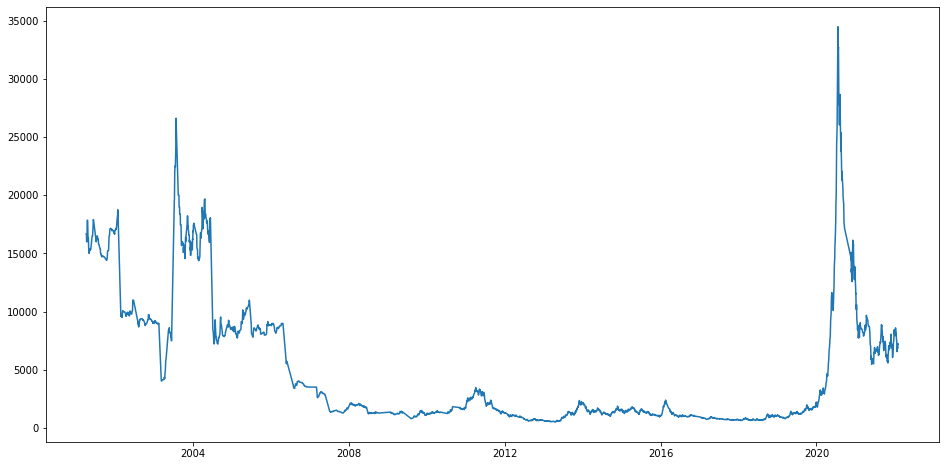

In [9]:
df["Date"]=pd.to_datetime(df["<DTYYYYMMDD>"],format="%Y%m%d")
df.index=df['Date']
plt.figure(figsize=(16,8))
plt.plot(df["<CLOSE>"],label='Close Price history')

In [10]:
data=df.sort_index(ascending=True,axis=0)
new_dataset=pd.DataFrame(index=range(0,len(df)),columns=['Date','Close','Open','High','Vol','Low'])
for i in range(0,len(data)):
    new_dataset["Date"][i]=data['Date'][i]
    new_dataset["Close"][i]=data["<CLOSE>"][i]
    new_dataset["Open"][i]=data["<OPEN>"][i]
    new_dataset["High"][i]=data["<HIGH>"][i]
    new_dataset["Vol"][i]=data["<VOL>"][i]
    new_dataset["Low"][i]=data["<LOW>"][i]



In [11]:
tmp_dataset=new_dataset.copy()
tmp_dataset
tmp_dataset['Date'] = pd.to_datetime(tmp_dataset['Date']).dt.date
#tmp_dataset
tmp_dataset.set_index('Date', inplace = True)
tmp_dataset

,Close,Open,High,Vol,Low
Date,,,,,
2001-04-08,16690.0,0.0,16690.0,6413,16379.0
2001-04-10,16495.0,16690.0,16495.0,204,16495.0
2001-04-11,16000.0,16495.0,16200.0,4170,16000.0
2001-04-14,16000.0,16000.0,16000.0,9654,15700.0
2001-04-15,16200.0,16000.0,16200.0,3143,16000.0
...,...,...,...,...,...
2022-01-29,6950.0,6680.0,7010.0,28693495,6760.0
2022-01-30,6860.0,6950.0,7150.0,21167703,6710.0
2022-01-31,7040.0,6860.0,7200.0,23751787,6600.0


In [12]:

#idx = pd.date_range('2001-05-06', '2022-01-30')
idx = pd.date_range('2018-08-18', '2022-01-30')
tmp_dataset = tmp_dataset.reindex(idx, fill_value=0)
for i in range(len(tmp_dataset)):
  if tmp_dataset['Close'][i] == 0:
    tmp_dataset['Close'][i] = tmp_dataset['Close'][i-1]
  if tmp_dataset['Open'][i] == 0:
    tmp_dataset['Open'][i] = tmp_dataset['Open'][i-1]
  if tmp_dataset['High'][i] == 0:
    tmp_dataset['High'][i] = tmp_dataset['High'][i-1]
  if tmp_dataset['Vol'][i] == 0:
    tmp_dataset['Vol'][i] = tmp_dataset['Vol'][i-1]
  if tmp_dataset['Low'][i] == 0:
    tmp_dataset['Low'][i] = tmp_dataset['Low'][i-1]
  
tmp_dataset

,Close,Open,High,Vol,Low
2018-08-18,694.0,690.0,700.0,14036801,685.0
2018-08-19,699.0,694.0,710.0,28989970,692.0
2018-08-20,692.0,699.0,703.0,24310314,685.0
2018-08-21,716.0,692.0,724.0,77323594,700.0
2018-08-22,716.0,692.0,724.0,77323594,700.0
...,...,...,...,...,...
2022-01-26,6680.0,6570.0,6880.0,22351572,6410.0
2022-01-27,6680.0,6570.0,6880.0,22351572,6410.0
2022-01-28,6680.0,6570.0,6880.0,22351572,6410.0
2022-01-29,6950.0,6680.0,7010.0,28693495,6760.0


In [13]:
tmp_dataset.index.name = 'Date'
tmp_dataset.tail(10)
# aggregated_hashtag_df = aggregated_hashtag_df.drop(['Date'], axis=1)
# aggregated_hashtag_df.head()

,Close,Open,High,Vol,Low
Date,,,,,
2022-01-21,7730.0,7800.0,7990.0,11244143,7570.0
2022-01-22,7420.0,7730.0,7830.0,23404457,7350.0
2022-01-23,7070.0,7420.0,7260.0,13757976,7050.0
2022-01-24,6890.0,7070.0,7140.0,23293072,6720.0
2022-01-25,6570.0,6890.0,6870.0,23200326,6550.0
2022-01-26,6680.0,6570.0,6880.0,22351572,6410.0
2022-01-27,6680.0,6570.0,6880.0,22351572,6410.0
2022-01-28,6680.0,6570.0,6880.0,22351572,6410.0
2022-01-29,6950.0,6680.0,7010.0,28693495,6760.0


In [14]:
aggregated_hashtag_df.index.astype = 'datetime64[ns]'
tmp_dataset.index.astype = 'datetime64[ns]'


In [15]:
tmp_dataset.tail(10)


,Close,Open,High,Vol,Low
Date,,,,,
2022-01-21,7730.0,7800.0,7990.0,11244143,7570.0
2022-01-22,7420.0,7730.0,7830.0,23404457,7350.0
2022-01-23,7070.0,7420.0,7260.0,13757976,7050.0
2022-01-24,6890.0,7070.0,7140.0,23293072,6720.0
2022-01-25,6570.0,6890.0,6870.0,23200326,6550.0
2022-01-26,6680.0,6570.0,6880.0,22351572,6410.0
2022-01-27,6680.0,6570.0,6880.0,22351572,6410.0
2022-01-28,6680.0,6570.0,6880.0,22351572,6410.0
2022-01-29,6950.0,6680.0,7010.0,28693495,6760.0


In [16]:
aggregated_hashtag_df.tail()

,Date,view_count
Date,,
2019-03-25,2019-03-25,60738
2019-03-24,2019-03-24,2709
2019-03-23,2019-03-23,1969
2019-03-22,2019-03-22,942
2019-03-21,2019-03-21,878


In [17]:
inner_merged_total = pd.merge(tmp_dataset, aggregated_hashtag_df, left_index=True, right_index=True)
inner_merged_total
####del inner_merged_total['Date']
inner_merged_total


,Close,Open,High,Vol,Low,Date,view_count
Date,,,,,,,
2019-03-21,863.0,848.0,868.0,19433917,853.0,2019-03-21,878
2019-03-22,863.0,848.0,868.0,19433917,853.0,2019-03-22,942
2019-03-23,863.0,848.0,868.0,19433917,853.0,2019-03-23,1969
2019-03-24,863.0,848.0,868.0,19433917,853.0,2019-03-24,2709
2019-03-25,887.0,863.0,906.0,20218094,860.0,2019-03-25,60738
...,...,...,...,...,...,...,...
2022-01-26,6680.0,6570.0,6880.0,22351572,6410.0,2022-01-26,15878
2022-01-27,6680.0,6570.0,6880.0,22351572,6410.0,2022-01-27,23916
2022-01-28,6680.0,6570.0,6880.0,22351572,6410.0,2022-01-28,9991


In [18]:
merged_df = inner_merged_total

In [19]:
import numpy as np
import pandas as pd

merged_df['Date'] = merged_df.index
merged_df.reset_index(drop=True, inplace=True)
merged_df['period'] = merged_df.index
merged_df.set_index('period', inplace = True)
merged_df

,Close,Open,High,Vol,Low,Date,view_count
period,,,,,,,
0,863.0,848.0,868.0,19433917,853.0,2019-03-21,878
1,863.0,848.0,868.0,19433917,853.0,2019-03-22,942
2,863.0,848.0,868.0,19433917,853.0,2019-03-23,1969
3,863.0,848.0,868.0,19433917,853.0,2019-03-24,2709
4,887.0,863.0,906.0,20218094,860.0,2019-03-25,60738
...,...,...,...,...,...,...,...
1039,6680.0,6570.0,6880.0,22351572,6410.0,2022-01-26,15878
1040,6680.0,6570.0,6880.0,22351572,6410.0,2022-01-27,23916
1041,6680.0,6570.0,6880.0,22351572,6410.0,2022-01-28,9991


In [20]:
tmp_dataset

tmp_dataset['Date'] = tmp_dataset.index
tmp_dataset.reset_index(drop=True, inplace=True)
tmp_dataset['period'] = tmp_dataset.index
tmp_dataset.set_index('period', inplace = True)
tmp_dataset

,Close,Open,High,Vol,Low,Date
period,,,,,,
0,694.0,690.0,700.0,14036801,685.0,2018-08-18
1,699.0,694.0,710.0,28989970,692.0,2018-08-19
2,692.0,699.0,703.0,24310314,685.0,2018-08-20
3,716.0,692.0,724.0,77323594,700.0,2018-08-21
4,716.0,692.0,724.0,77323594,700.0,2018-08-22
...,...,...,...,...,...,...
1257,6680.0,6570.0,6880.0,22351572,6410.0,2022-01-26
1258,6680.0,6570.0,6880.0,22351572,6410.0,2022-01-27
1259,6680.0,6570.0,6880.0,22351572,6410.0,2022-01-28


In [21]:
copy_data = merged_df.copy()
del copy_data['Date']

copy_data.to_csv('ww.csv')
data = pd.read_csv('ww.csv')

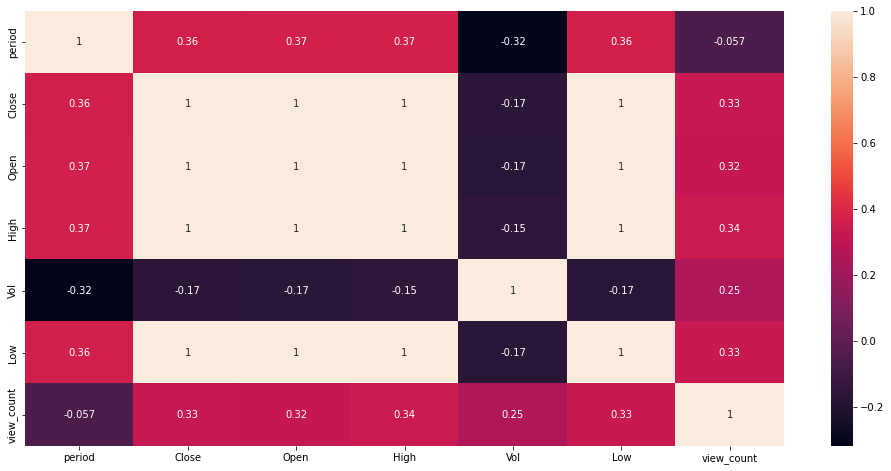

In [22]:
import pandas as pd #For data related tasks
import matplotlib.pyplot as plt #for data visualization 

from sklearn.linear_model import LinearRegression
import seaborn as sns
plt.figure(1 , figsize = (17 , 8))
cor = sns.heatmap(data.corr(), annot = True)

In [23]:
data

,period,Close,Open,High,Vol,Low,view_count
0,0,863.0,848.0,868.0,19433917,853.0,878
1,1,863.0,848.0,868.0,19433917,853.0,942
2,2,863.0,848.0,868.0,19433917,853.0,1969
3,3,863.0,848.0,868.0,19433917,853.0,2709
4,4,887.0,863.0,906.0,20218094,860.0,60738
...,...,...,...,...,...,...,...
1039,1039,6680.0,6570.0,6880.0,22351572,6410.0,15878
1040,1040,6680.0,6570.0,6880.0,22351572,6410.0,23916
1041,1041,6680.0,6570.0,6880.0,22351572,6410.0,9991
1042,1042,6950.0,6680.0,7010.0,28693495,6760.0,39410


In [24]:

x = data.loc[:,'Open':'High']
y = data.loc[:,'Close']

In [25]:
x.head()

,Open,High
0,848.0,868.0
1,848.0,868.0
2,848.0,868.0
3,848.0,868.0
4,863.0,906.0


In [26]:
y.head()

0    863.0
1    863.0
2    863.0
3    863.0
4    887.0
Name: Close, dtype: float64

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1,random_state = 0)
LR = LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [28]:
print("LR.score",LR.score(x_test,y_test))

LR.score 0.998115222898076


In [29]:
y_pred = LR.predict(x_test)
d2 = pd.DataFrame(index=range(0,len(y_test)),columns=['Close','Close Pred'])

for i in range(len(y_test)):
  d2['Close'][i] = y_test.values[i]
  d2['Close Pred'][i] = y_pred[i]
d2

,Close,Close Pred
0,1602.0,1597.485734
1,8060.0,8295.672252
2,9290.0,9116.561259
3,8890.0,9043.220178
4,1344.0,1353.811339
...,...,...
100,9300.0,9116.561259
101,11484.0,11223.029245
102,1590.0,1535.246173
103,7790.0,8082.57297


In [30]:
y_pred2 = LR.predict(x)
d3 = pd.DataFrame(index=range(0,len(y)),columns=['Close','Close Pred'])

for i in range(len(y)):
  d3['Close'][i] = y.values[i]
  d3['Close Pred'][i] = y_pred2[i]
d3

,Close,Close Pred
0,863.0,834.909055
1,863.0,834.909055
2,863.0,834.909055
3,863.0,834.909055
4,887.0,863.126733
...,...,...
1039,6680.0,6721.203967
1040,6680.0,6721.203967
1041,6680.0,6721.203967
1042,6950.0,6842.656196


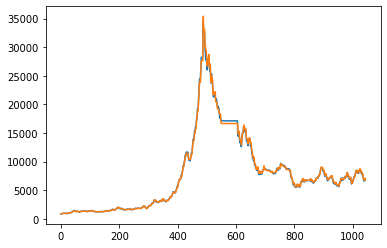

In [31]:
plt.plot(d3[['Close','Close Pred']])

In [32]:
len_df = len(d3['Close Pred'])
d3['Growth'] = np.nan
d3['Growth Percent'] = np.nan

for i in range (len_df-1):
  GrowthPercent =((d3['Close Pred'][i+1] - d3['Close'][i])/ d3['Close'][i])*100
  d3['Growth Percent'][i+1] = GrowthPercent
  status = 0
  if (GrowthPercent > 0.5):
    status = +1
  elif(GrowthPercent < -0.5):
    status = -1
  else:
    status = 0
  d3['Growth'][i+1] = status
d3.head(100)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,Close,Close Pred,Growth,Growth Percent
0,863.0,834.909055,NaN,NaN
1,863.0,834.909055,-1.0,-3.255034
2,863.0,834.909055,-1.0,-3.255034
3,863.0,834.909055,-1.0,-3.255034
4,887.0,863.126733,0.0,0.014685
...,...,...,...,...
95,1362.0,1315.587958,1.0,0.966075
96,1370.0,1359.038839,0.0,-0.217413
97,1344.0,1353.811339,-1.0,-1.181654
98,1344.0,1353.811339,1.0,0.730010


In [33]:
###########################################################